In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.shape

(101, 18)

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 1.Analyse the data using the visualizations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


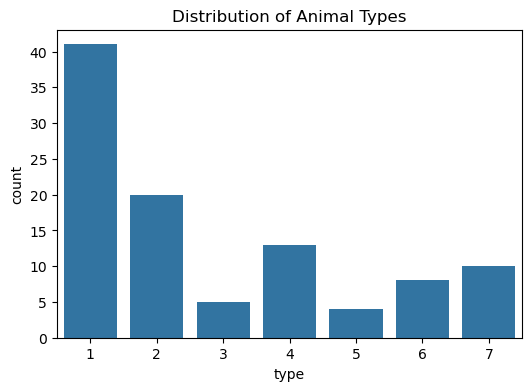

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Animal Types")
plt.show()

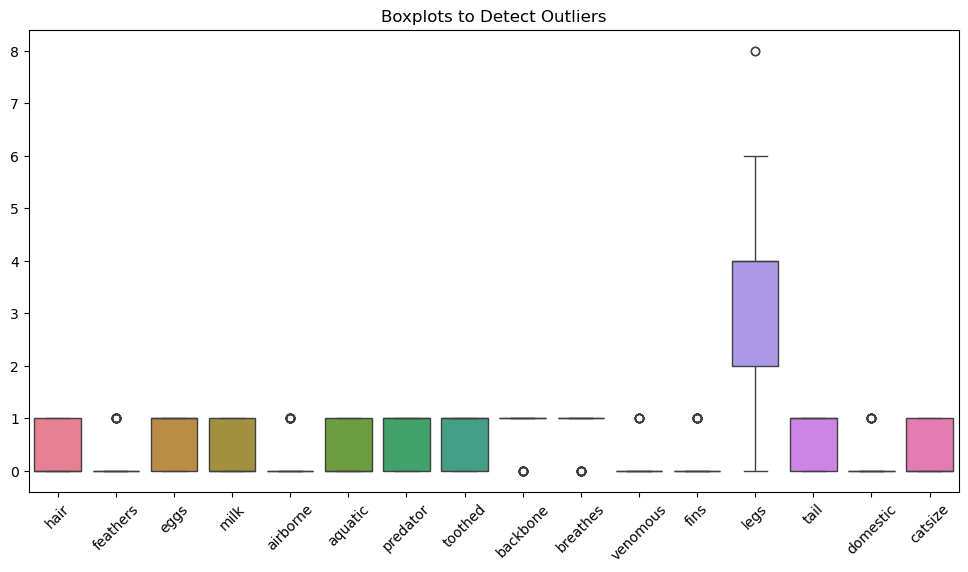

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('type', axis=1))
plt.title("Boxplots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

## 2.Preprocessing

In [11]:
df = df.drop('animal name', axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
## outlier_capping:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

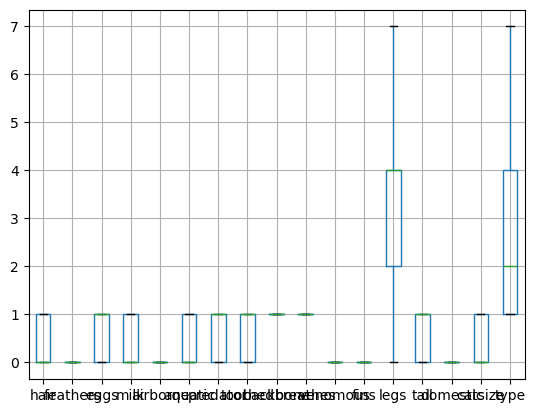

In [13]:
df.boxplot()
plt.show()

## 3.Train-Test Split

In [14]:
features = df.drop('type',axis=1)
target = df['type']

In [15]:
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0
3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1


In [16]:
target.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [17]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 1.16139451,  0.        , -1.18522652, ..., -1.69841555,
         0.        ,  1.13818037],
       [ 1.16139451,  0.        , -1.18522652, ...,  0.58878406,
         0.        ,  1.13818037],
       [-0.86103386,  0.        ,  0.84372057, ...,  0.58878406,
         0.        , -0.87859537],
       ...,
       [ 1.16139451,  0.        , -1.18522652, ...,  0.58878406,
         0.        ,  1.13818037],
       [-0.86103386,  0.        ,  0.84372057, ..., -1.69841555,
         0.        , -0.87859537],
       [-0.86103386,  0.        ,  0.84372057, ...,  0.58878406,
         0.        , -0.87859537]])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


### 4. K-Nearest Neighbours 

In [19]:
import warnings
warnings.filterwarnings('ignore')

### 5. An appropriate distance metric and value for K1

In [20]:
Knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
Knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [21]:
y_pred=Knn.predict(x_test)
y_pred

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 5, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [23]:
### KNN----Hyper paramater-----Gridsearchcv

In [24]:
## Grid Search
params=dict(n_neighbors=range(1,100))
grid_search=GridSearchCV(Knn,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=1),
             param_grid={'n_neighbors': range(1, 100)})

In [25]:
grid_search.best_params_

{'n_neighbors': 1}

### 6. Evaluate

In [26]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy Score: 0.9523809523809523


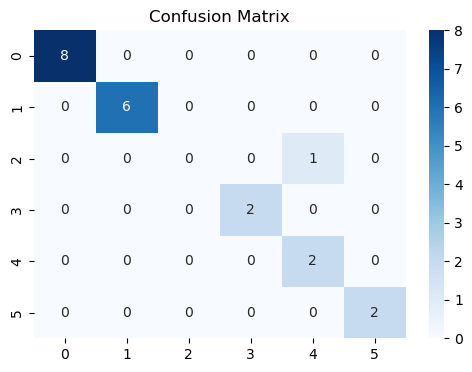

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### 7. Visualize the decision boundaries of the classifier.

In [28]:
## PCA:

In [29]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [30]:
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
X_train_pca

array([[-0.651186  ,  0.9689086 ],
       [-0.86884886, -0.82109222],
       [-0.86884886, -0.82109222],
       [ 1.34458669,  1.09087341],
       [ 1.34458669,  1.09087341],
       [-0.83294103, -0.47791808],
       [-0.86884886, -0.82109222],
       [ 3.2306855 , -1.0665362 ],
       [-0.86884886, -0.82109222],
       [-0.55083416,  1.10188944],
       [ 1.34458669,  1.09087341],
       [ 1.38427972,  0.92031576],
       [-2.98595287, -0.2723385 ],
       [ 1.28392788,  0.78733492],
       [ 1.31983571,  1.13050906],
       [ 1.31983571,  1.13050906],
       [ 1.34458669,  1.09087341],
       [-2.6258193 ,  1.22412106],
       [-2.89558358, -0.13372513],
       [ 3.2306855 , -1.0665362 ],
       [-2.91379159,  0.2003278 ],
       [ 1.31983571,  1.13050906],
       [ 2.02027218, -1.46207724],
       [ 3.0905739 , -1.43406853],
       [-2.87938998, -0.9090539 ],
       [-0.86884886, -0.82109222],
       [ 1.34458669,  1.09087341],
       [ 1.30867886,  0.74769927],
       [ 1.02297185,

In [31]:
X_test_pca

array([[-0.89359984, -0.78145657],
       [-2.95004504,  0.07083564],
       [ 0.99822087, -0.92495047],
       [-0.651186  ,  0.9689086 ],
       [ 1.30867886,  0.74769927],
       [ 0.99822087, -0.92495047],
       [ 1.30867886,  0.74769927],
       [-0.98396913, -0.92006994],
       [-0.98396913, -0.92006994],
       [-0.95921815, -0.95970559],
       [-0.73039844,  1.21310502],
       [ 3.2306855 , -1.0665362 ],
       [ 1.31983571,  1.13050906],
       [ 1.02414615, -0.5761438 ],
       [ 3.11532488, -1.47370419],
       [-0.61527817,  1.31208274],
       [-2.96120189, -0.31197415],
       [ 1.34458669,  1.09087341],
       [-0.89359984, -0.78145657],
       [-0.86884886, -0.82109222],
       [-0.57558514,  1.1415251 ]])

In [32]:
knn_pca = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)
knn_pca

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [33]:
h = .02 
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xx,yy

(array([[-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713],
        [-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713],
        [-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713],
        ...,
        [-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713],
        [-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713],
        [-3.98595287, -3.96595287, -3.94595287, ...,  5.03404713,
          5.05404713,  5.07404713]]),
 array([[-2.57268191, -2.57268191, -2.57268191, ..., -2.57268191,
         -2.57268191, -2.57268191],
        [-2.55268191, -2.55268191, -2.55268191, ..., -2.55268191,
         -2.55268191, -2.55268191],
        [-2.53268191, -2.53268191, -2.53268191, ..., -2.53268191,
         -2.53268191, -2.53268191],
        ...,
        [ 2.16731809,  2.16731809,  2.16731809, ...,  

In [34]:
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

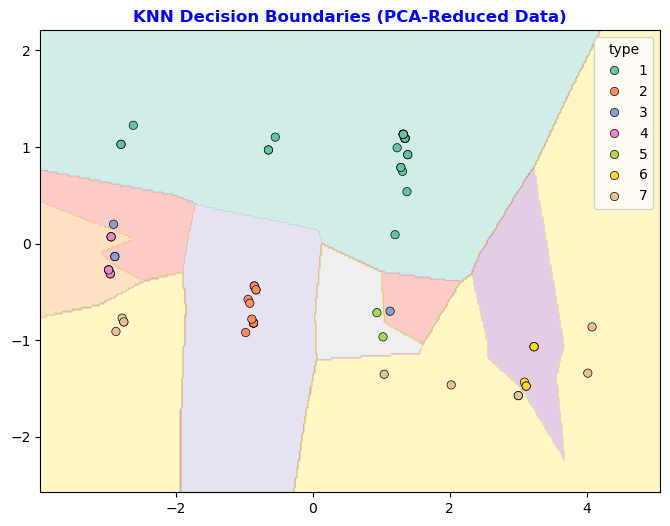

In [35]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set3, alpha=0.4)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="Set2", edgecolor='k')
plt.title("KNN Decision Boundaries (PCA-Reduced Data)",color='blue',fontweight='bold')
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification and regression tasks.

1. n_neighbors:
******The number of nearest neighbors to consider for determining the output.
******A smaller 𝑘 makes the model sensitive to noise, while a larger 𝑘 smoothens the decision boundary but may overlook local patterns.
2. Weights:
*******Determines how to weight the contribution of neighbors.
*******Options include:
-------------Uniform =====equal weight to all neighbors
-------------Distance ====closer neighbors have more influence
3. Algorithm:
********The algorithm used to find the nearest neighbors, such as:
------------------'auto', 'ball_tree', 'kd_tree', or 'brute'
------------------Ball Tree: Suitable for low-dimensional data.
------------------KD-Tree: Effective for moderate dimensions.
********Affects the speed of computation, especially on large datasets.
4. p (for Minkowski distance):
*********The power parameter that defines the distance metric:
---------------p=1 → Manhattan distance
---------------p=2 → Euclidean distance (default)
5. Metric:
************Specifies the distance function (e.g., 'euclidean', 'manhattan', or a custom metric).
************These hyperparameters can be tuned using cross-validation (e.g., with GridSearchCV) to optimize model accuracy and generalization.
6. Leaf Size (for Ball Tree or KD-Tree):
************Affects the efficiency of the search algorithm. Larger values reduce the tree-building time but may slow down queries.
7. Number of Jobs (𝑛_jobs):
Specifies the number of parallel jobs to speed up computation. Useful for large datasets.

## 2. What distance metrics can be used in KNN?

In K-Nearest Neighbors (KNN), distance metrics determine how the "closeness" between data points is calculated.